In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from statannot import add_stat_annotation

In [3]:
PX_SIZE_UM = 1.6

In [114]:
# path = '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/23_01_2020/D_5/Chip_1_shapes.csv'
path= '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/D*/*stats.csv'
paths = sorted(glob(path))
len(paths)

31

In [115]:
import re

r = re.compile(r'D(\d)/(\S*)_stats.csv')
labels = [r.findall(p)[0] for p in paths]

In [116]:
dfs = []
for path, l in zip(paths, labels):
    try:
        df = pd.read_csv(path, index_col=0)
        df['cell_number'] = l[1]
        df['day'] = l[0]
        dfs.append(df)
    except UnicodeDecodeError:
        print(f'bad file {path}')

In [141]:
dfs_all = pd.concat(dfs)
dfs_all['major_axis_length_um'] = dfs_all.major_axis_length * PX_SIZE_UM

In [162]:
dfs_all = dfs_all[dfs_all.cell_number != '300+cond001']
dfs_all

,well_index,area,eccentricity,major_axis_length,cell_number,day,major_axis_length_um
0,0,NaN,NaN,NaN,100+cond,1,NaN
1,1,2649.0,0.762921,72.745863,100+cond,1,116.393380
2,2,2231.0,0.608107,60.303620,100+cond,1,96.485792
3,3,1928.0,0.731825,61.625543,100+cond,1,98.600869
4,4,2483.0,0.845136,77.162176,100+cond,1,123.459481
...,...,...,...,...,...,...,...
53,53,84038.0,0.332671,337.421458,300,7,539.874332
54,54,60710.0,0.405494,291.478914,300,7,466.366262
55,55,1478.0,0.797497,58.008335,300,7,92.813336
56,56,52525.0,0.517165,280.432214,300,7,448.691543


In [169]:
dfs_all.to_csv('/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/stats.csv')

In [4]:
dfs_all = pd.read_csv('/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/stats.csv', index_col=0)

In [5]:
cell_nums = dfs_all.cell_number.unique()
cell_nums

array(['100+cond', '100', '200+cond', '200', '300+cond', '300'],
      dtype=object)

In [6]:
days = dfs_all.day.unique()
days

array([1, 4, 5, 6, 7])

In [20]:
test_params_days = dict(test='Mann-Whitney', text_format='star', loc='inside', verbose=1,
                                    box_pairs=(('100+cond', '100'),
                                               ('200+cond', '200'),
                                               ('300+cond', '300'),
                                               ('100', '200'),
                                               ('100', '300')
                                              )
                  )

day 1
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.756e-01 U_stat=7.560e+02
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.510e+02
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.680e+02
100 v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.474e+03
100 v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.064e-01 U_stat=1.148e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9

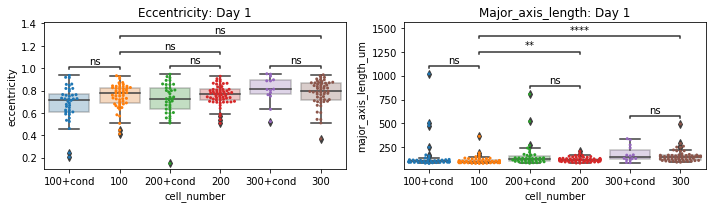

day 4
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.485e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.102e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.690e+02
100 v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.972e-01 U_stat=1.517e+03
100 v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.297e-01 U_stat=1.339e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1

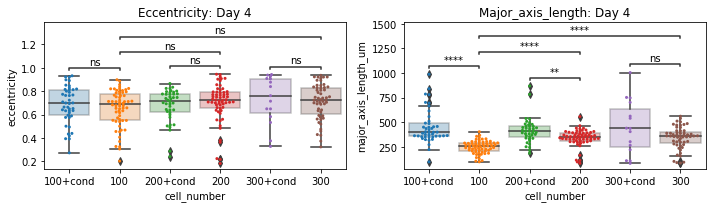

day 5
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.165e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.870e+02
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.120e+02
100 v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.095e-01 U_stat=1.424e+03
100 v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.237e-01 U_stat=1.319e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1

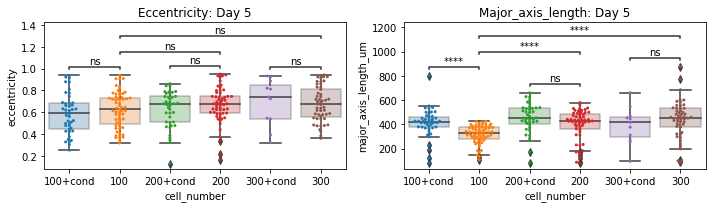

day 6
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.193e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.097e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.025e-01 U_stat=5.540e+02
100 v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.577e+03
100 v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.367e-02 U_stat=1.115e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4

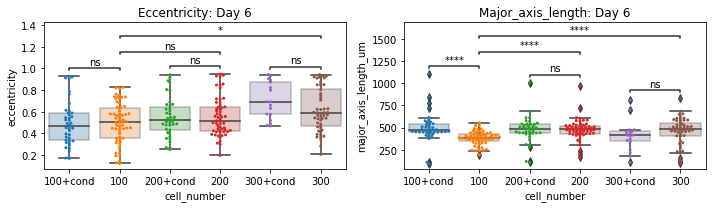

day 7
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.897e-01 U_stat=1.384e+03
200+cond v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.037e+03
300+cond v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.570e+02
100 v.s. 200: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.344e-01 U_stat=1.202e+03
100 v.s. 300: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.809e-03 U_stat=9.350e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

100+cond v.s. 100: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1

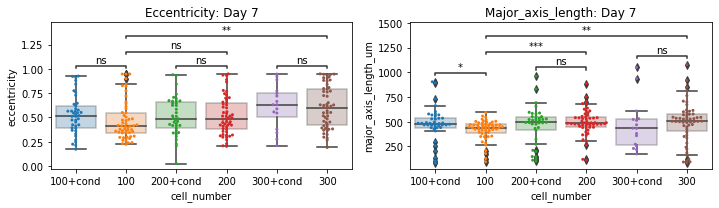

In [21]:
for day in days:
    print(f'day {day}')
    fig, ax = plt.subplots(ncols=2, figsize=(10,3))
    df = dfs_all[dfs_all.day == day]
    sns.swarmplot(data=df, x='cell_number', y='eccentricity', ax=ax[0], size=3)
    sns.boxplot(data=df, x='cell_number', y='eccentricity', boxprops=dict(alpha=.3), ax=ax[0])
    ax[0].set_title(f'Eccentricity: Day {day}')
    
    stats_ecc = add_stat_annotation(data=df, x='cell_number', y='eccentricity', ax=ax[0], **test_params_days)

    sns.swarmplot(data=df, x='cell_number', y='major_axis_length_um', ax=ax[1], size=3)
    sns.boxplot(data=df, x='cell_number', y='major_axis_length_um', boxprops=dict(alpha=.3), ax=ax[1])
    ax[1].set_title(f'Major_axis_length: Day {day}')
    
    
    stats_mal = add_stat_annotation(data=df, x='cell_number', y='major_axis_length_um', ax=ax[1], **test_params_days)

    plt.tight_layout()
    plt.show()

cell num 100+cond


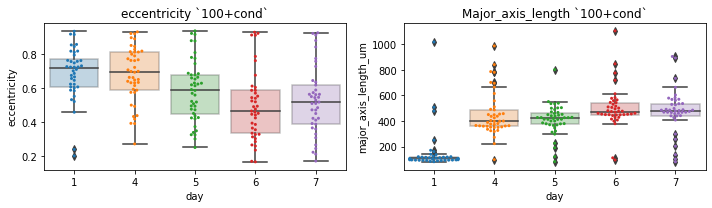

cell num 100


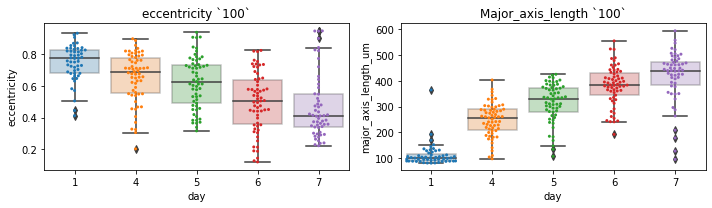

cell num 200+cond


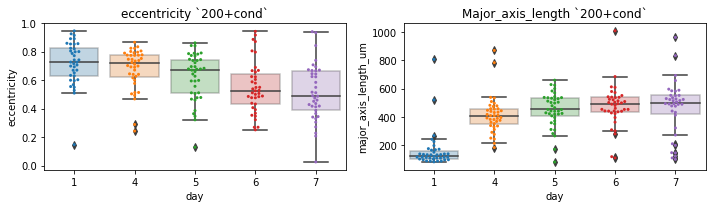

cell num 200


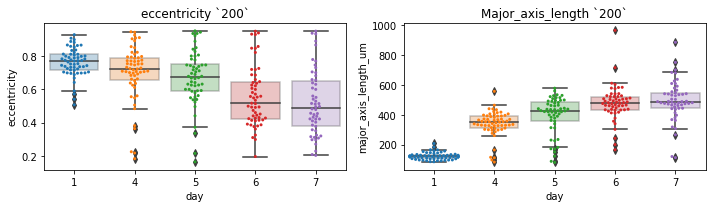

cell num 300+cond


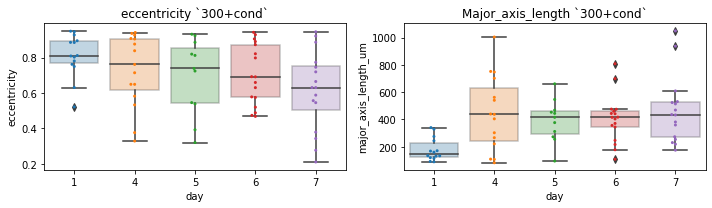

cell num 300


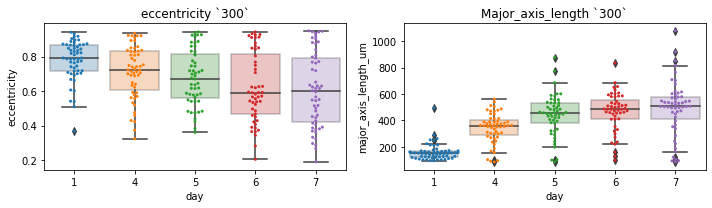

In [166]:
for cell_num in cell_nums:
    print(f'cell num {cell_num}')
    fig, ax = plt.subplots(ncols=2, figsize=(10,3))
    df = dfs_all[dfs_all.cell_number == cell_num]
    sns.swarmplot(data=df, x='day', y='eccentricity', ax=ax[0], size=3)
    sns.boxplot(data=df, x='day', y='eccentricity', boxprops=dict(alpha=.3), ax=ax[0])
    ax[0].set_title(f'eccentricity `{cell_num}`')

    sns.swarmplot(data=df, x='day', y='major_axis_length_um', ax=ax[1], size=3)
    sns.boxplot(data=df, x='day', y='major_axis_length_um', boxprops=dict(alpha=.3), ax=ax[1])
    ax[1].set_title(f'Major_axis_length `{cell_num}`')

    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Major axis length, um')

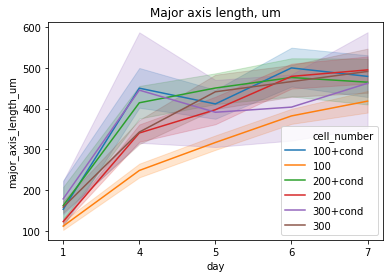

In [167]:
sns.lineplot(x='day', y='major_axis_length_um', hue='cell_number',data=dfs_all)
plt.title('Major axis length, um')

Text(0.5, 1.0, 'Eccentricity')

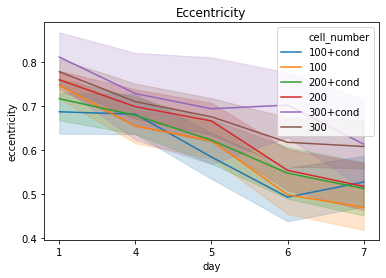

In [168]:
sns.lineplot(x='day', y='eccentricity', hue='cell_number',data=dfs_all)
plt.title('Eccentricity')